**Descripción del Proyecto**
Este proyecto se basa en recopilar la información histórica de saldos de balance de los últimos 12 meses de las entidades del sector microfinancero, disponibles en la página de la Superintendencia Financiera, con el fin de transformarla y almacenarla, con la finalidad de consultar indicadores, calcular nuevas variables, realizar comparativos con los pares más representativos, y generar información que permita una correcta gestión del riesgo de crédito principalmente, teniendo en cuenta que desempeñamos cargos en entidades del sector y en esta área específicamente. La información histórica del comportamiento financiero de las entidades del sector, permitirá identificar tendencias en la calidad de la cartera y su deterioro, así como el impacto en el estado de resultados de los cambios que se puedan llegar a observar a nivel de sistema.

**Contexto de los Datos:**

Los datos fueron tomados de la pagina de la Superintencia Financiera de colombia, los cuales están contenidos en un archivos .xls, discriminados por periodos (AÑOMES), que para el proyecto corresponde a los periodos desde nov-22 hasta oct-23.
En este  archivo se recopila la información de saldos de balance de las entidades financieras de forma mensual, el archivo está estructurado en columnas para cada entidad,  en la primera columna se indica el periodo al qeu corresponde, en las siguientes tres columnas se encuentran los conceptos a nivel de total, subtotal y detalle. Los registros son de tipo numérico que corresponden a millones de pesos y porcentajes de participación. Aproximadamente se cuenta con una base de 1.300.000 datos.


**Problemática y Valor Generado:**

Construir un dashboard que permita gestionar la información recopilada de manera automática, permitiendo visualizar gráficamente los datos de variables y diversos indicadores los cuales serán calculados con los datos recopilados y que son relevantes en la toma de decisiones en la gestión del riesgo de crédito, permitiendo a través de listas desplegables seleccionar ciertas entidades o ciertos indicadores que sean de interés para el usuario.  En el dashboard se podrán visualizar variables e indicadores relacionados con los siguientes ítems:

-	Cartera vigente
-	Cartera vencida
-	Deterioro de cartera
-	Icv – Indicador de cartera vencida
-	Cartera en riesgo
-	Indicador de cartera en riesgo
-	Pérdida tolerada
-	Coberturas de cartera vencida y en riesgo

El proceso de limpieza, imputación y visualización de datos es relevante en el desarrollo del proyecto, teniendo en cuenta que el archivo contiene información que no es de analisis por parte del área para el cual va dirigido el proyecto, así como, se podrá filtrar por las entidades que son de interes, consideradas pares dentro del sector microfinanciero.

**Composición de la Base de Datos:**

La base de datos contiene 32 columnas y 46.140 filas, donde la primera columna corresponde al AÑOMES, las siguientes dos columnas, RUBRO Y CONCEPTO, almacenan las variables disponibles, y las 29 columnas restantes contiene la información expresada en millones, de cada una de las entidades financieras, lo que da un total de registros de 1.338.060.

La base dispone de 3.845 variables, de las cuales se seleccionaron 81 variables que están relacionadas con la gestión de riesgo de crédito, las cuales se describen en el diccionario de datos.










In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


**Diccionario de datos:**

In [ ]:
diccionario_de_datos = pd.read_excel("/content/Diccionario_de_datos.xlsx")
diccionario_de_datos

,RUBRO,CONCEPTO,Descripción
0,100000,ACTIVO,Todo lo que posee la empresa y que permiten el...
1,140000,CARTERA DE CREDITOS Y OPERACIONES DE LEASING F...,Portafolio de crédito
2,140800,CARTERA Y OPERACIONES DE LEASING DE CONSUMO,Portafolio de crédito modalidad consumo
3,140805,CATEGORIA A RIESGO NORMAL CARTERA Y OPERACIONE...,Portafolio de crédito modalidad consumo catego...
4,140810,CATEGORIA B RIESGO ACEPTABLE CARTERA Y OPERACI...,Portafolio de crédito modalidad consumo catego...
...,...,...,...
84,828510,CAPITAL - MORA MAYOR A 4 MESES,Portafolio de créditos de microcrédito que se ...
85,828604,CAPITAL - MORA MAYOR A 1 MES HASTA 2 MESES,Portafolio de créditos de microcrédito que se ...
86,828606,CAPITAL - MORA MAYOR A 2 MESES HASTA 3 MESES,Portafolio de créditos de microcrédito que se ...
87,828608,CAPITAL - MORA MAYOR A 3 MESES HASTA 4 MESES,Portafolio de créditos de microcrédito que se ...


Se carga la base historica

In [ ]:
base_historica = pd.read_excel("/content/Base_historica_sector_financiero.xls")
base_historica.head(10)

,AÑOMES,RUBRO,CONCEPTO,1 - BANCO DE BOGOTÁ,2 - BANCO POPULAR,6 - ITAÚ,7 - BANCOLOMBIA,9 - CITIBANK,12 - BANCO GNB SUDAMERIS,13 - BBVA COLOMBIA,...,57 - BANCO PICHINCHA S.A.,58 - COOPCENTRAL,59 - BANCO SANTANDER,60 - BANCO MUNDO MUJER S.A.,62 - MIBANCO S.A.,63 - BANCO SERFINANZA S.A.,64 - BANCO J.P: MORGAN COLOMBIA S.A.,65 - LULO BANK,66 - BANCO BTG PACTUAL COLOMBIA,67 - BANCO UNIÓN
0,202211,100000,ACTIVO,113173.294287,32413.201642,29870.580382,240161.801325,14347.201252,36223.527532,99080.499869,...,3014.296525,1298.664719,6923.193254,3065.899807,1942.606261,2575.843236,4571.479389,378.573512,751.596873,969.701461
1,202211,110000,EFECTIVO,8721.040197,1813.229278,1379.585560,11332.190106,1891.292952,4254.515175,10387.112324,...,126.804371,186.681202,360.314594,297.075122,169.556937,342.560886,7.042423,35.055205,289.389337,107.939351
2,202211,110500,CAJA,2038.234465,928.628473,168.316893,7816.346638,128.888265,377.049233,3317.189926,...,40.754743,33.092155,1.994909,39.586962,67.736636,7.833190,0.000000,0.000757,0.001000,62.274501
3,202211,110505,EFECTIVO,2038.215835,928.625273,168.315793,7816.346638,128.888265,377.046965,3317.014193,...,40.740475,33.083305,1.980561,39.299591,67.642246,7.805542,0.000000,0.000000,0.000000,62.265801
4,202211,110510,CHEQUES,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.208271,0.061305,0.020069,0.000000,0.000000,0.000000,0.000000
5,202211,110515,DEPOSITOS POR PRIMAS RECAUDADAS,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,202211,110520,CAJA MENOR,0.018631,0.003200,0.001100,0.000000,0.000000,0.002269,0.175734,...,0.014268,0.008850,0.014347,0.079100,0.033085,0.007579,0.000000,0.000757,0.001000,0.008700
7,202211,111000,BANCO DE LA REPUBLICA-,1362.584869,668.411003,671.872372,1619.020269,952.182213,2312.743447,953.764318,...,72.478232,22.096071,296.452061,16.205176,6.212782,55.676991,1.254562,4.361251,81.004976,5.464006
8,202211,111005,CUENTA CORRIENTE BANCARIA,1362.584869,668.411003,671.872372,1619.020269,952.182213,2312.743447,953.764318,...,72.478232,22.096071,296.452061,16.205176,6.212782,55.676991,1.254562,2.611251,30.991926,0.165587
9,202211,111010,CERTIFICADOS DE CAMBIO PROPIOS,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


Las cifras están expresadas en millones, para que la información sea más sencilla de visualizar y de comprender.

Se genera la cantidad de registros de la base, el total de las columnas y su nombre correspondiente, la cantidad de datos nulos por columna y el tipo de dato almacenado en cada columna.

In [ ]:
base_historica.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46140 entries, 0 to 46139
Data columns (total 32 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   AÑOMES                                46140 non-null  int64  
 1   RUBRO                                 46140 non-null  int64  
 2   CONCEPTO                              46140 non-null  object 
 3   1 - BANCO DE BOGOTÁ                   46140 non-null  float64
 4   2 - BANCO POPULAR                     46140 non-null  float64
 5   6 - ITAÚ                              46140 non-null  float64
 6   7 - BANCOLOMBIA                       46140 non-null  float64
 7   9 - CITIBANK                          46140 non-null  float64
 8   12 - BANCO GNB SUDAMERIS              46140 non-null  float64
 9   13 - BBVA COLOMBIA                    46140 non-null  float64
 10  23 - BANCO DE OCCIDENTE               46140 non-null  float64
 11  30 - BANCO CAJA

Se corrobora la composición de la data.
Ninguna de las columnas presenta datos nullos, ya que la información corresponde a estados financieros que se reportan al ente regulador de forma obligatoria y sin presentar inconsistencias.

In [ ]:
base_historica.isnull().sum()

AÑOMES                                  0
RUBRO                                   0
CONCEPTO                                0
1 - BANCO DE BOGOTÁ                     0
2 - BANCO POPULAR                       0
6 - ITAÚ                                0
7 - BANCOLOMBIA                         0
9 - CITIBANK                            0
12 - BANCO GNB SUDAMERIS                0
13 - BBVA COLOMBIA                      0
23 - BANCO DE OCCIDENTE                 0
30 - BANCO CAJA SOCIAL S.A.             0
39 - BANCO DAVIVIENDA                   0
42 - SCOTIABANK COLPATRIA S.A.          0
43 - BANAGRARIO                         0
49 - AV VILLAS                          0
51 - CREDIFINANCIERA S.A.               0
52 - BANCAMÍA S.A.                      0
53 - BANCO W S.A.                       0
54 - BANCOOMEVA                         0
55 - FINANDINA                          0
56 - BANCO FALABELLA S.A.               0
57 - BANCO PICHINCHA S.A.               0
58 - COOPCENTRAL                  

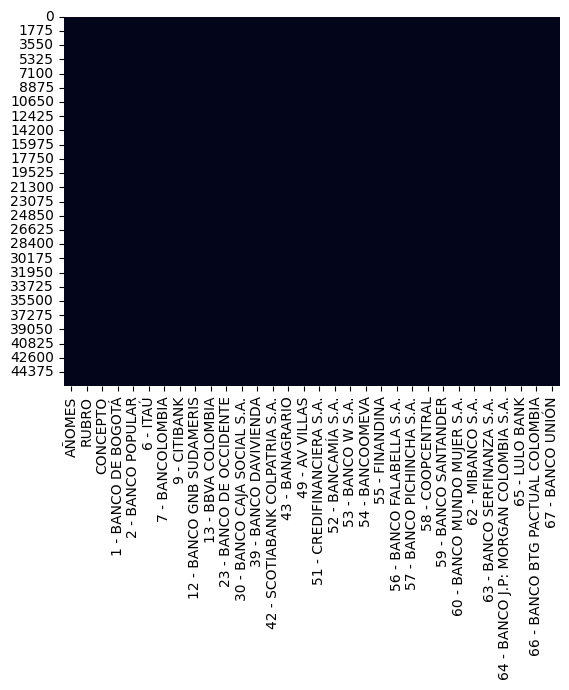

In [ ]:
sns.heatmap(base_historica.isnull(), cbar= False)
plt.show()

Se visualiza la cantidad de registros por periodo.

In [ ]:
base_historica["AÑOMES"].value_counts()

202211    3845
202212    3845
202301    3845
202302    3845
202303    3845
202304    3845
202305    3845
202306    3845
202307    3845
202308    3845
202309    3845
202310    3845
Name: AÑOMES, dtype: int64

Se valida que la data contiene 12 periodos de información y que para cada periodo existe la misma cantidad de regitros, lo que hace que
la data sea consistente.

Se realiza una copia de la base original para iniciar con la eliminación de las filas que no se requieren.

In [ ]:
df_base_historica = base_historica.copy()
df_base_historica.head(10)

,AÑOMES,RUBRO,CONCEPTO,1 - BANCO DE BOGOTÁ,2 - BANCO POPULAR,6 - ITAÚ,7 - BANCOLOMBIA,9 - CITIBANK,12 - BANCO GNB SUDAMERIS,13 - BBVA COLOMBIA,...,57 - BANCO PICHINCHA S.A.,58 - COOPCENTRAL,59 - BANCO SANTANDER,60 - BANCO MUNDO MUJER S.A.,62 - MIBANCO S.A.,63 - BANCO SERFINANZA S.A.,64 - BANCO J.P: MORGAN COLOMBIA S.A.,65 - LULO BANK,66 - BANCO BTG PACTUAL COLOMBIA,67 - BANCO UNIÓN
0,202211,100000,ACTIVO,113173.294287,32413.201642,29870.580382,240161.801325,14347.201252,36223.527532,99080.499869,...,3014.296525,1298.664719,6923.193254,3065.899807,1942.606261,2575.843236,4571.479389,378.573512,751.596873,969.701461
1,202211,110000,EFECTIVO,8721.040197,1813.229278,1379.585560,11332.190106,1891.292952,4254.515175,10387.112324,...,126.804371,186.681202,360.314594,297.075122,169.556937,342.560886,7.042423,35.055205,289.389337,107.939351
2,202211,110500,CAJA,2038.234465,928.628473,168.316893,7816.346638,128.888265,377.049233,3317.189926,...,40.754743,33.092155,1.994909,39.586962,67.736636,7.833190,0.000000,0.000757,0.001000,62.274501
3,202211,110505,EFECTIVO,2038.215835,928.625273,168.315793,7816.346638,128.888265,377.046965,3317.014193,...,40.740475,33.083305,1.980561,39.299591,67.642246,7.805542,0.000000,0.000000,0.000000,62.265801
4,202211,110510,CHEQUES,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.208271,0.061305,0.020069,0.000000,0.000000,0.000000,0.000000
5,202211,110515,DEPOSITOS POR PRIMAS RECAUDADAS,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,202211,110520,CAJA MENOR,0.018631,0.003200,0.001100,0.000000,0.000000,0.002269,0.175734,...,0.014268,0.008850,0.014347,0.079100,0.033085,0.007579,0.000000,0.000757,0.001000,0.008700
7,202211,111000,BANCO DE LA REPUBLICA-,1362.584869,668.411003,671.872372,1619.020269,952.182213,2312.743447,953.764318,...,72.478232,22.096071,296.452061,16.205176,6.212782,55.676991,1.254562,4.361251,81.004976,5.464006
8,202211,111005,CUENTA CORRIENTE BANCARIA,1362.584869,668.411003,671.872372,1619.020269,952.182213,2312.743447,953.764318,...,72.478232,22.096071,296.452061,16.205176,6.212782,55.676991,1.254562,2.611251,30.991926,0.165587
9,202211,111010,CERTIFICADOS DE CAMBIO PROPIOS,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


Creamos un base con las variables a trabajar, a partir del diccionario de datos.

In [ ]:
df_seleccion = diccionario_de_datos["RUBRO"]
df_seleccion

0     100000
1     140000
2     140800
3     140805
4     140810
       ...  
84    828510
85    828604
86    828606
87    828608
88    828610
Name: RUBRO, Length: 89, dtype: int64

In [ ]:
df_base_historica_final = pd.merge(df_seleccion, df_base_historica, on='RUBRO', how='left')
df_base_historica_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1068 entries, 0 to 1067
Data columns (total 32 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   RUBRO                                 1068 non-null   int64  
 1   AÑOMES                                1068 non-null   int64  
 2   CONCEPTO                              1068 non-null   object 
 3   1 - BANCO DE BOGOTÁ                   1068 non-null   float64
 4   2 - BANCO POPULAR                     1068 non-null   float64
 5   6 - ITAÚ                              1068 non-null   float64
 6   7 - BANCOLOMBIA                       1068 non-null   float64
 7   9 - CITIBANK                          1068 non-null   float64
 8   12 - BANCO GNB SUDAMERIS              1068 non-null   float64
 9   13 - BBVA COLOMBIA                    1068 non-null   float64
 10  23 - BANCO DE OCCIDENTE               1068 non-null   float64
 11  30 - BANCO CAJA S

La base final contiene 1068 registros los cuales están distribuidos por periodo de forma consistente.

In [ ]:
df_base_historica_final["AÑOMES"].value_counts()

202211    89
202212    89
202301    89
202302    89
202303    89
202304    89
202305    89
202306    89
202307    89
202308    89
202309    89
202310    89
Name: AÑOMES, dtype: int64

In [ ]:
conteo = df_base_historica_final.groupby(['RUBRO', 'CONCEPTO']).size()
CONTEO_12 = conteo[conteo < 12]
print(CONTEO_12)

RUBRO   CONCEPTO                                                       
140805  CATEGORIA A RIESGO NORMAL CARTERA Y OPERACIONES DE LEASING         11
        CATEGORIA A RIESGO NORMAL CARTERA Y OPERACIONES DE LEASING D        1
140810  CATEGORIA B RIESGO ACEPTABLE CARTERA Y OPERACIONES DE LEAS         11
        CATEGORIA B RIESGO ACEPTABLE CARTERA Y OPERACIONES DE LEASIN&     1
140815  CATEGORIA C RIESGO APRECIABLE CARTERA Y OPERACIONES DE LEA         11
        CATEGORIA C RIESGO APRECIABLE CARTERA Y OPERACIONES DE LEASI&     1
140820  CATEGORIA D RIESGO SIGNIFICATIVO CARTERA Y OPERACIONES DE          11
        CATEGORIA D RIESGO SIGNIFICATIVO CARTERA Y OPERACIONES DE LE&     1
140825  CATEGORIA E RIESGO DE INCOBRABILIDAD CARTERA Y OPERACIONES         11
        CATEGORIA E RIESGO DE INCOBRABILIDAD CARTERA Y OPERACIONES DÈ&     1
141005  CATEGORIA A RIESGO NORMAL CARTERA Y OPERACIONES DE LEASING         11
        CATEGORIA A RIESGO NORMAL CARTERA Y OPERACIONES DE LEASING CÒ&

Se ajustan los nombres de los conceptos duplicados, para que cada rubro tenga un único concepto-

In [ ]:
indice = df_base_historica_final['RUBRO']==140805
df_base_historica_final["CONCEPTO"][indice] = "CATEGORIA A RIESGO NORMAL CARTERA Y OPERACIONES DE LEASING"

indice_1 = df_base_historica_final['RUBRO']==140810
df_base_historica_final["CONCEPTO"][indice_1] = "CATEGORIA B RIESGO ACEPTABLE CARTERA Y OPERACIONES DE LEAS"

indice_2 = df_base_historica_final['RUBRO']==140815
df_base_historica_final["CONCEPTO"][indice_2] = "CATEGORIA C RIESGO APRECIABLE CARTERA Y OPERACIONES DE LEA"

indice_3 = df_base_historica_final['RUBRO']==140820
df_base_historica_final["CONCEPTO"][indice_3] = "CATEGORIA D RIESGO SIGNIFICATIVO CARTERA Y OPERACIONES DE"

indice_4 = df_base_historica_final['RUBRO']==140825
df_base_historica_final["CONCEPTO"][indice_4] = "CATEGORIA E RIESGO DE INCOBRABILIDAD CARTERA Y OPERACIONES"

indice_5 = df_base_historica_final['RUBRO']==149100
df_base_historica_final["CONCEPTO"][indice_5] = "CATEGORIA A RIESGO NORMAL CARTERA Y OPERACIONES DE LEASING"

indice_6 = df_base_historica_final['RUBRO']==141005
df_base_historica_final["CONCEPTO"][indice_6] = "CATEGORIA A RIESGO NORMAL CARTERA Y OPERACIONES DE LEASING"

indice_6 = df_base_historica_final['RUBRO']==141005
df_base_historica_final["CONCEPTO"][indice_6] = "CATEGORIA A RIESGO NORMAL CARTERA Y OPERACIONES DE LEASING"

indice_7 = df_base_historica_final['RUBRO']==141010
df_base_historica_final["CONCEPTO"][indice_7] = "CATEGORIA B RIESGO ACEPTABLE CARTERA Y OPERACIONES DE LEAS"

indice_8 = df_base_historica_final['RUBRO']==141015
df_base_historica_final["CONCEPTO"][indice_8] = "CATEGORIA C RIESGO APRECIABLE, CARTERA Y OPERACIONES DE LE"

indice_9 = df_base_historica_final['RUBRO']==141020
df_base_historica_final["CONCEPTO"][indice_9] = "CATEGORIA D RIESGO SIGNIFICATIVO CARTERA Y OPERACIONES DE"

indice_10 = df_base_historica_final['RUBRO']==141025
df_base_historica_final["CONCEPTO"][indice_10] = "CATEGORIA E RIESGO DE INCOBRABILIDAD CARTERA Y OPERACIONES"

indice_11 = df_base_historica_final['RUBRO']==419830
df_base_historica_final["CONCEPTO"][indice_11] = "REINTEGRO PROVISIONES COMPONENTE INDIVIDUAL CONTRACICLICO"

indice_12 = df_base_historica_final['RUBRO']==419825
df_base_historica_final["CONCEPTO"][indice_12] = "REINTEGRO PROVISIONES COMPONENTE INDIVIDUAL CONTRACICLICO"

indice_13 = df_base_historica_final['RUBRO']==419835
df_base_historica_final["CONCEPTO"][indice_13] = "REINTEGRO PROVISIONES COMPONENTE INDIVIDUAL CONTRACICLICO"

indice_14 = df_base_historica_final['RUBRO']==419840
df_base_historica_final["CONCEPTO"][indice_14] = "REINTEGRO PROVISIONES COMPONENTE INDIVIDUAL CONTRACICLICO"

indice_15 = df_base_historica_final['RUBRO']==419850
df_base_historica_final["CONCEPTO"][indice_15] = "REINTEGRO PROVISIONES COMPONENTE INDIVIDUAL CONTRACICLICO"

indice_16 = df_base_historica_final['RUBRO']==517100
df_base_historica_final["CONCEPTO"][indice_16] = "COMPONENTE CONTRACICLICO DETERIORO (PROVISIONES) INDIVIDUA"

<ipython-input-15-a53b96c48f1a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_base_historica_final["CONCEPTO"][indice] = "CATEGORIA A RIESGO NORMAL CARTERA Y OPERACIONES DE LEASING"
<ipython-input-15-a53b96c48f1a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_base_historica_final["CONCEPTO"][indice_1] = "CATEGORIA B RIESGO ACEPTABLE CARTERA Y OPERACIONES DE LEAS"
<ipython-input-15-a53b96c48f1a>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-v

In [ ]:
conteo = df_base_historica_final.groupby(['RUBRO', 'CONCEPTO']).size()
CONTEO_12 = conteo[conteo < 12]
print(CONTEO_12)

Series([], dtype: int64)


VISULIZACION DE DATOS
Se realiza una selección del último periodo con los saldos de cartera, para observar los niveles de cartera entidad.





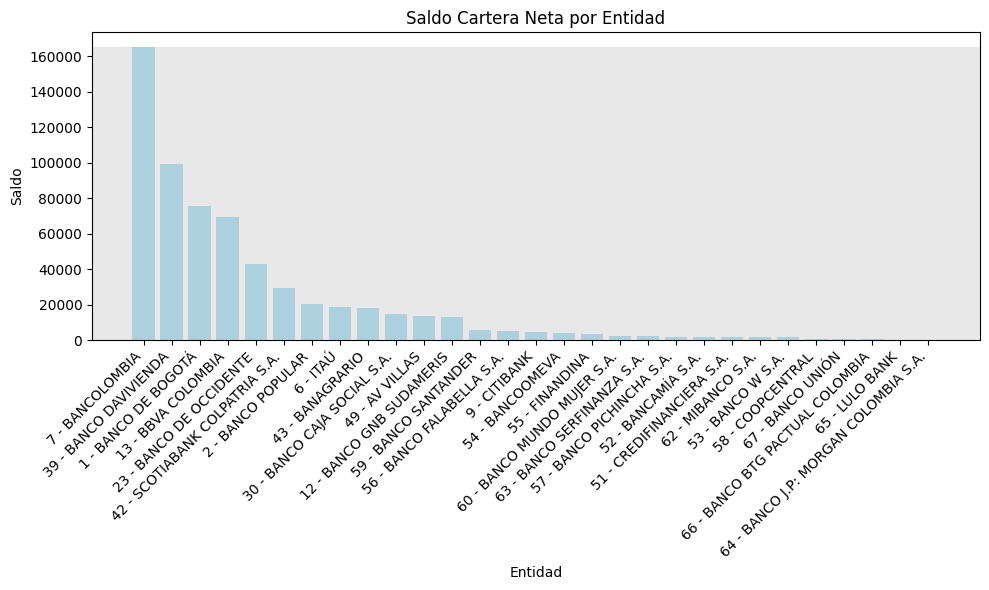

In [ ]:
df_rubro_seleccionado = df_base_historica_final.loc[(df_base_historica_final['RUBRO'] == 140000) & (df_base_historica_final["AÑOMES"]==202310)]
df_rubro_seleccionado = df_rubro_seleccionado.drop(columns=['RUBRO', 'AÑOMES', 'CONCEPTO'])

df_graf = df_rubro_seleccionado.transpose()

df_graf.columns = [ 'Saldo']
df_graf = df_graf.sort_values(by='Saldo', ascending=False)

#df_graf

import matplotlib.pyplot as plt

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(df_graf.index, df_graf['Saldo'], color='skyblue')
plt.xlabel('Entidad')
plt.ylabel('Saldo')
plt.title('Saldo Cartera Neta por Entidad')
plt.xticks(rotation=45, ha='right')
plt.axhspan(0, max(df_graf['Saldo']), facecolor='lightgray', alpha=0.5)
plt.tight_layout()
plt.show()



Se observa que de las 29 entidades financieras que existen en el sistema financiero colombiano, Bancolombia tienen la mayor participación, dado que es la entidad con mayor reconocimiento a nivel nacional.

Se realiza una selección del último periodo con los saldos de cartera de modalidad microcrédito, para observar los niveles de cartera por entidad.

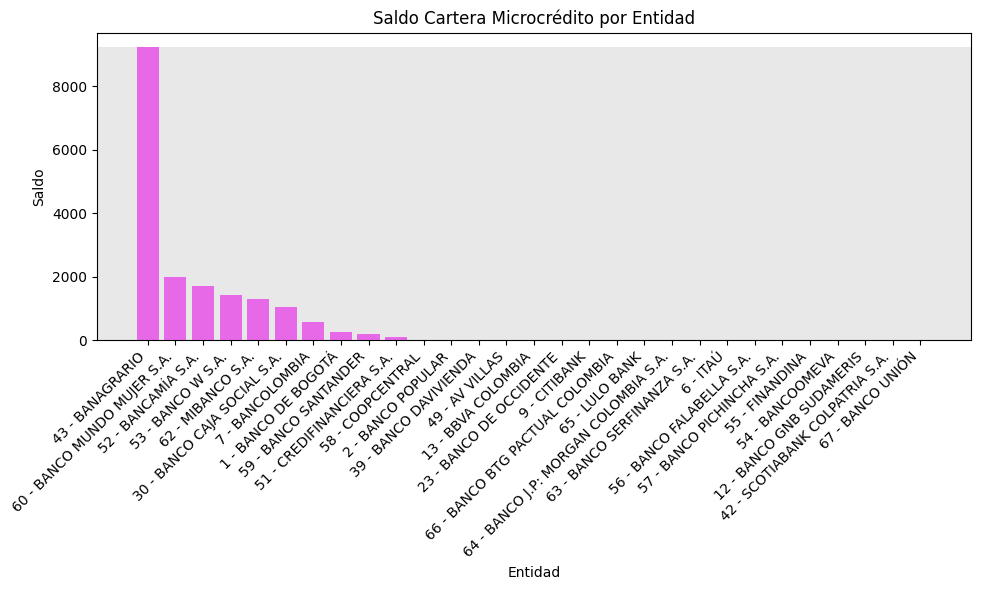

In [ ]:
df_rubro_seleccionado_2 = df_base_historica_final.loc[(df_base_historica_final['RUBRO'] == 141200) & (df_base_historica_final["AÑOMES"]==202310)]
df_rubro_seleccionado_2 = df_rubro_seleccionado_2.drop(columns=['RUBRO', 'AÑOMES', 'CONCEPTO'])

df_graf_2 = df_rubro_seleccionado_2.transpose()

df_graf_2.columns = [ 'Saldo']
df_graf_2 = df_graf_2.sort_values(by='Saldo', ascending=False)

#df_graf

import matplotlib.pyplot as plt

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(df_graf_2.index, df_graf_2['Saldo'], color='magenta')
plt.xlabel('Entidad')
plt.ylabel('Saldo')
plt.title('Saldo Cartera Microcrédito por Entidad')
plt.xticks(rotation=45, ha='right')
plt.axhspan(0, max(df_graf_2['Saldo']), facecolor='lightgray', alpha=0.5)
plt.tight_layout()
plt.show()


Se observa que Banco Agrario presenta el mayor saldo de la cartera Microcrédito en Colombia, debido a su nicho de mercado, el sector agropecuario, adicionalmente que es una entidad con una gran trayectoria y a la vez recibe el apoyo del gobierno nacional.

Teniendo en cuenta que el proyecto se basa en el analisis del sector microfinanciero, y partiendo de los resultados anteriores, se formará un grupo de pares, dedicados a las microfinanzas:
Banco Mundo Mujer,
Bancamia,
Banco W,
Mi Banco,
Banco Caja Social

In [ ]:
df_base_historica_final.columns

Index(['RUBRO', 'AÑOMES', 'CONCEPTO', '1 - BANCO DE BOGOTÁ',
       '2 - BANCO POPULAR', '6 - ITAÚ', '7 - BANCOLOMBIA', '9 - CITIBANK',
       '12 - BANCO GNB SUDAMERIS', '13 - BBVA COLOMBIA',
       '23 - BANCO DE OCCIDENTE', '30 - BANCO CAJA SOCIAL S.A.',
       '39 - BANCO DAVIVIENDA', '42 - SCOTIABANK COLPATRIA S.A.',
       '43 - BANAGRARIO', '49 - AV VILLAS', '51 - CREDIFINANCIERA S.A.',
       '52 - BANCAMÍA S.A.', '53 - BANCO W S.A.', '54 - BANCOOMEVA',
       '55 - FINANDINA', '56 - BANCO FALABELLA S.A.',
       '57 - BANCO PICHINCHA S.A.', '58 - COOPCENTRAL', '59 - BANCO SANTANDER',
       '60 - BANCO MUNDO MUJER S.A.', '62 - MIBANCO S.A.',
       '63 - BANCO SERFINANZA S.A.', '64 - BANCO J.P: MORGAN COLOMBIA S.A.',
       '65 - LULO BANK', '66 - BANCO BTG PACTUAL COLOMBIA',
       '67 - BANCO UNIÓN'],
      dtype='object')

In [ ]:
df_microfinancieras = df_base_historica_final[['RUBRO', 'AÑOMES', 'CONCEPTO', '60 - BANCO MUNDO MUJER S.A.','52 - BANCAMÍA S.A.', '53 - BANCO W S.A.',
                                              '62 - MIBANCO S.A.', '30 - BANCO CAJA SOCIAL S.A.']]
df_microfinancieras



,RUBRO,AÑOMES,CONCEPTO,60 - BANCO MUNDO MUJER S.A.,52 - BANCAMÍA S.A.,53 - BANCO W S.A.,62 - MIBANCO S.A.,30 - BANCO CAJA SOCIAL S.A.
0,100000,202211,ACTIVO,3065.899807,2202.050826,2145.954038,1942.606261,19507.744602
1,100000,202212,ACTIVO,3078.571755,2257.602740,2143.375671,1930.366683,19621.760282
2,100000,202301,ACTIVO,3251.282867,2274.662997,2111.361400,1955.014900,19557.352596
3,100000,202302,ACTIVO,3084.055421,2358.010204,2147.528043,1972.627872,19751.820865
4,100000,202303,ACTIVO,3037.575831,2380.875256,2171.112756,1970.066227,20410.618844
...,...,...,...,...,...,...,...,...
1063,828610,202306,CAPITAL - MORA MAYOR A 4 MESES,48.409789,40.454958,24.459963,13.575611,0.000000
1064,828610,202307,CAPITAL - MORA MAYOR A 4 MESES,51.507409,32.407048,25.937679,14.011660,0.000000
1065,828610,202308,CAPITAL - MORA MAYOR A 4 MESES,52.672040,36.848162,0.205241,14.833160,0.000000
1066,828610,202309,CAPITAL - MORA MAYOR A 4 MESES,55.520423,5.991182,29.818068,14.780000,0.000000


Se grafica la participación de los salos por entidad microfinanciera

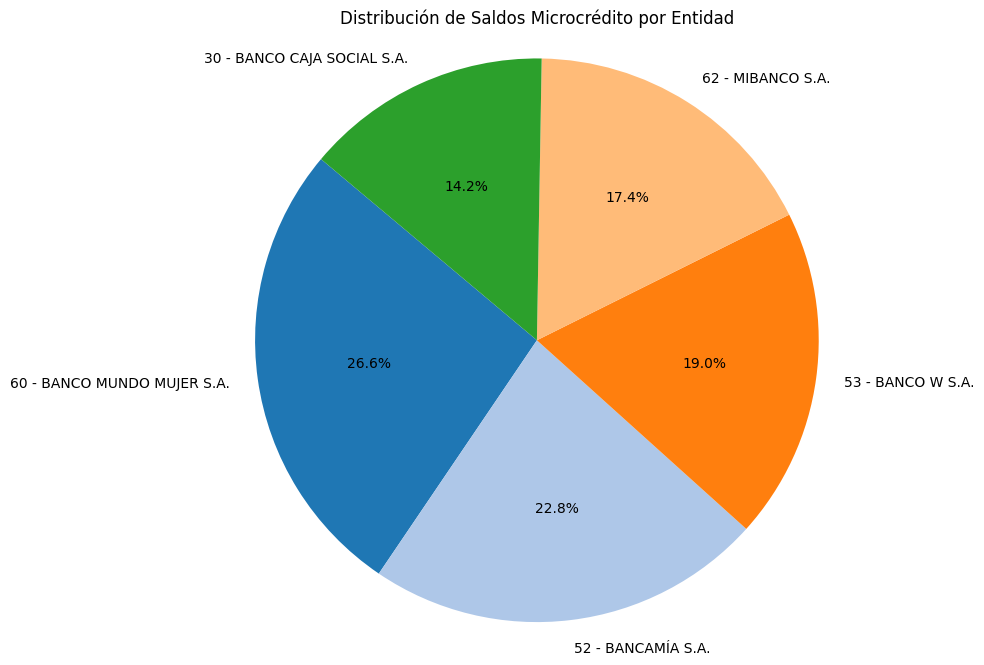

In [ ]:
df_rubro_seleccionado_3 = df_microfinancieras.loc[(df_microfinancieras['RUBRO'] == 141200) & (df_microfinancieras["AÑOMES"]==202310)]
df_rubro_seleccionado_3 = df_rubro_seleccionado_3.drop(columns=['RUBRO', 'CONCEPTO', 'AÑOMES'])

df_graf_3 = df_rubro_seleccionado_3.transpose()

df_graf_3.columns = [ 'Saldo']
df_graf_3

saldos = df_graf_3['Saldo']
entidades = df_graf_3.index

colores = plt.cm.tab20.colors

# Crear el gráfico de torta
plt.figure(figsize=(8, 8))
plt.pie(saldos, labels=entidades, autopct='%1.1f%%', startangle=140, colors = colores)
plt.title('Distribución de Saldos Microcrédito por Entidad')
# Mostrar el gráfico
plt.axis('equal')  # Para asegurar que el gráfico sea circular
plt.show()

De las microfinancieras seleccionadas, se observa que Banco Mundo Mujer, presenta la mayor de saldos de cartera Microcrédito (26.6%), seguido de Bancamia (22.8%) y Banco W (19.0%), en conjunto estas 3 entidades agrupan el 68.4% del total de saldo de cartera de microcrédito.

In [ ]:
df_rubro_seleccionado_4 = df_microfinancieras.loc[((df_microfinancieras['RUBRO'] == 828500) | (df_microfinancieras['RUBRO'] == 828600))  & (df_microfinancieras["AÑOMES"]==202310)]
df_rubro_seleccionado_4 = df_rubro_seleccionado_4.drop(columns=['RUBRO', 'CONCEPTO', 'AÑOMES'])

df_rubro_seleccionado_5 = pd.DataFrame(df_rubro_seleccionado_4.sum(axis=0))
df_rubro_seleccionado_5.columns = [ 'Saldo']
df_rubro_seleccionado_5

#df_graf_4 = df_rubro_seleccionado_4.transpose()
#df_graf_4.columns = [ 'Saldo']
#df_graf_4


,Saldo
60 - BANCO MUNDO MUJER S.A.,2027.545227
52 - BANCAMÍA S.A.,1774.747841
53 - BANCO W S.A.,1463.109424
62 - MIBANCO S.A.,1324.703231
30 - BANCO CAJA SOCIAL S.A.,1081.867183


Grafica de los saldos vigentes (mora entre 0 y 30 días)

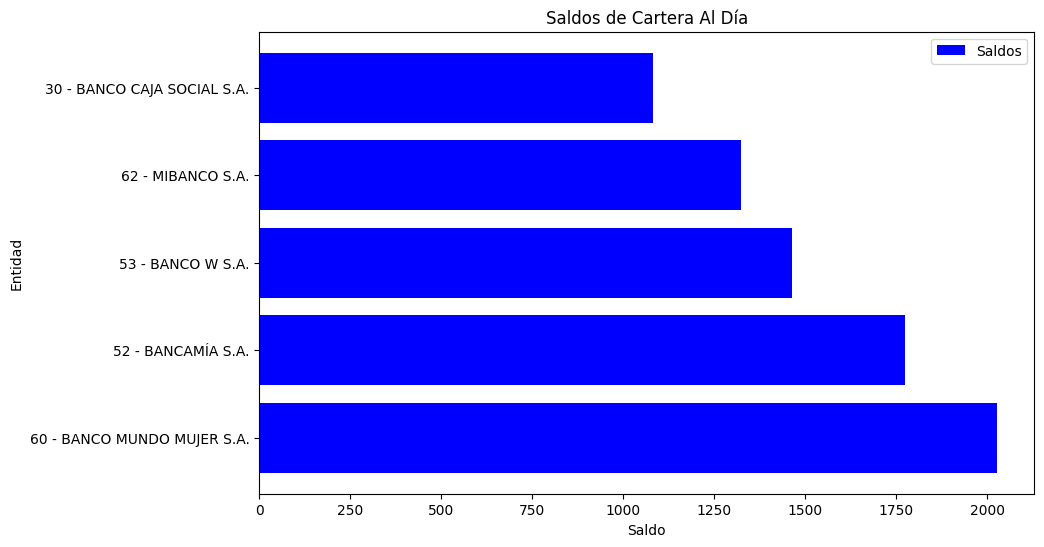

In [ ]:
saldos = df_rubro_seleccionado_5['Saldo']
entidades = df_rubro_seleccionado_5.index

plt.figure(figsize=(10, 6))
plt.barh(entidades, saldos, color='blue', label='Saldos')
#plt.barh(bancos, saldo_911, color='red', label='Saldo 911', left=saldo_887)  # Usar left para apilar las barras
plt.xlabel('Saldo')
plt.ylabel('Entidad')
plt.title('Saldos de Cartera Al Día')
plt.legend()
plt.show()

Al revisar la cartera que se encuentra al día (mora 0-30 dias), tiene un comportamiento similar al total de la cartera microcrédito.

Se generan algunos conceptos agrupados solo para la cartera microcrédito, la cual es foco del proyecto.

CARTERA VIGENTE MICROCREDITO: se crea una fila para agrupar por añomes el total de cartera vigente mora 0-30

In [ ]:
codigos_rubro = [828500, 828600]

df_rubro_cartera_vigente = df_microfinancieras[df_microfinancieras['RUBRO'].isin(codigos_rubro)]

cartera_vigente_micro = df_rubro_cartera_vigente.groupby('AÑOMES')[['30 - BANCO CAJA SOCIAL S.A.', '52 - BANCAMÍA S.A.', '53 - BANCO W S.A.', '60 - BANCO MUNDO MUJER S.A.', '62 - MIBANCO S.A.']].sum()

cartera_vigente_micro['CONCEPTO'] = 'cartera_vigente_micro'
cartera_vigente_micro = cartera_vigente_micro.reset_index()
cartera_vigente_micro


,AÑOMES,30 - BANCO CAJA SOCIAL S.A.,52 - BANCAMÍA S.A.,53 - BANCO W S.A.,60 - BANCO MUNDO MUJER S.A.,62 - MIBANCO S.A.,CONCEPTO
0,202211,968.221964,1752.980318,1351.754770,1853.510067,1115.484007,cartera_vigente_micro
1,202212,974.421393,1767.515027,1363.407723,1857.890581,1127.449526,cartera_vigente_micro
2,202301,970.018339,1798.797319,1371.583256,1868.795070,1137.805833,cartera_vigente_micro
3,202302,980.107388,1828.584322,1381.703637,1896.206350,1159.235082,cartera_vigente_micro
4,202303,990.780669,1861.800002,1400.568252,1922.471522,1175.710347,cartera_vigente_micro
5,202304,1005.679468,1882.755575,1423.081854,1940.701823,1184.509614,cartera_vigente_micro
6,202305,1021.880641,1890.150505,1430.645273,1962.604176,1203.951511,cartera_vigente_micro
7,202306,1028.862926,1876.880601,1440.739753,1976.425340,1226.244517,cartera_vigente_micro
8,202307,1036.203775,1866.262383,1445.738841,1987.983774,1249.935637,cartera_vigente_micro
9,202308,1051.715831,1867.277854,1455.178610,2005.427171,1271.652389,cartera_vigente_micro


CARTERA RIESGO: se crea una fila para agregar por añomes la cartera en riesgo, esta corresponde a la cartera calificada en categorías B+C+D+E

In [ ]:
codigos_rubro_3 = [141210, 141215, 141220, 141225]

df_rubro_cartera_riesgo = df_microfinancieras[df_microfinancieras['RUBRO'].isin(codigos_rubro_3)]

cartera_riesgo_micro = df_rubro_cartera_riesgo.groupby('AÑOMES')[['30 - BANCO CAJA SOCIAL S.A.', '52 - BANCAMÍA S.A.', '53 - BANCO W S.A.', '60 - BANCO MUNDO MUJER S.A.', '62 - MIBANCO S.A.']].sum()

cartera_riesgo_micro['CONCEPTO'] = 'cartera_riesgo_micro'
cartera_riesgo_micro = cartera_riesgo_micro.reset_index()
cartera_riesgo_micro


,AÑOMES,30 - BANCO CAJA SOCIAL S.A.,52 - BANCAMÍA S.A.,53 - BANCO W S.A.,60 - BANCO MUNDO MUJER S.A.,62 - MIBANCO S.A.,CONCEPTO
0,202211,57.774930,148.532911,136.251412,136.694559,52.414545,cartera_riesgo_micro
1,202212,64.359216,157.606351,124.347196,146.600410,54.956441,cartera_riesgo_micro
2,202301,67.244343,162.474112,124.792572,151.737976,57.647875,cartera_riesgo_micro
3,202302,71.997449,163.806206,126.216362,160.628252,61.971855,cartera_riesgo_micro
4,202303,67.560579,170.948412,122.841647,169.684119,66.049186,cartera_riesgo_micro
5,202304,73.891022,179.018654,128.946170,176.530941,70.571440,cartera_riesgo_micro
6,202305,77.965514,184.741356,126.024033,184.989008,75.972317,cartera_riesgo_micro
7,202306,78.972007,157.368490,173.124296,191.645418,81.619876,cartera_riesgo_micro
8,202307,82.640620,181.926252,176.363204,199.430501,87.668354,cartera_riesgo_micro
9,202308,85.326733,190.021798,175.900962,201.692291,89.836823,cartera_riesgo_micro


CARTERA VENCIDA: se crea una fila para que por añomes agrupe el total de cartera vencida mora >30.

In [ ]:
codigos_rubro_2 = [828504,828506,828508,828510,828604,828606,828608,828610]

df_rubro_cartera_vencida = df_microfinancieras[df_microfinancieras['RUBRO'].isin(codigos_rubro_2)]

cartera_vencida_micro = df_rubro_cartera_vencida.groupby('AÑOMES')[['30 - BANCO CAJA SOCIAL S.A.', '52 - BANCAMÍA S.A.', '53 - BANCO W S.A.', '60 - BANCO MUNDO MUJER S.A.', '62 - MIBANCO S.A.']].sum()

cartera_vencida_micro['CONCEPTO'] = 'cartera_vencida_micro'
cartera_vencida_micro = cartera_vencida_micro.reset_index()
cartera_vencida_micro

,AÑOMES,30 - BANCO CAJA SOCIAL S.A.,52 - BANCAMÍA S.A.,53 - BANCO W S.A.,60 - BANCO MUNDO MUJER S.A.,62 - MIBANCO S.A.,CONCEPTO
0,202211,49.755473,101.778499,52.616702,75.183532,43.867389,cartera_vencida_micro
1,202212,54.997044,101.402309,50.727309,79.470700,45.951168,cartera_vencida_micro
2,202301,58.428783,103.409126,53.232344,83.165049,47.795097,cartera_vencida_micro
3,202302,62.875855,104.028820,54.399985,87.569619,51.015206,cartera_vencida_micro
4,202303,58.649175,109.451388,58.218832,88.573424,52.779390,cartera_vencida_micro
5,202304,65.393567,110.866401,61.832050,97.457036,56.636271,cartera_vencida_micro
6,202305,68.827640,113.704580,63.668107,98.157448,59.576811,cartera_vencida_micro
7,202306,68.908053,113.972182,65.998893,102.422790,61.730189,cartera_vencida_micro
8,202307,72.503212,108.992528,73.627941,106.762207,62.426998,cartera_vencida_micro
9,202308,74.979069,110.239690,75.829226,108.612621,62.014427,cartera_vencida_micro


DETERIORO DE CARTERA MICROCREDITO: se crea una fila para agrupar el total el deterioro de la cartera microcrédito.

In [ ]:
codigos_rubro_3 = [149300,149810]

df_rubro_deterioro_micro = df_microfinancieras[df_microfinancieras['RUBRO'].isin(codigos_rubro_3)]

deterioro_micro = df_rubro_deterioro_micro.groupby('AÑOMES')[['30 - BANCO CAJA SOCIAL S.A.', '52 - BANCAMÍA S.A.', '53 - BANCO W S.A.', '60 - BANCO MUNDO MUJER S.A.', '62 - MIBANCO S.A.']].sum()

deterioro_micro['CONCEPTO'] = 'deterioro_micro'
deterioro_micro = deterioro_micro.reset_index()
deterioro_micro

,AÑOMES,30 - BANCO CAJA SOCIAL S.A.,52 - BANCAMÍA S.A.,53 - BANCO W S.A.,60 - BANCO MUNDO MUJER S.A.,62 - MIBANCO S.A.,CONCEPTO
0,202211,51.131971,97.367270,67.360107,109.174536,40.587931,deterioro_micro
1,202212,54.077756,97.087947,64.472970,114.863728,41.790277,deterioro_micro
2,202301,55.839581,99.569698,67.601518,117.164905,43.113170,deterioro_micro
3,202302,58.662921,100.400031,69.554761,124.513907,45.150141,deterioro_micro
4,202303,57.162529,105.615931,73.623193,125.142919,45.962387,deterioro_micro
5,202304,59.209140,107.648951,77.609506,129.912849,47.955903,deterioro_micro
6,202305,62.748126,110.426422,78.443329,135.096063,50.572325,deterioro_micro
7,202306,62.079093,111.515325,81.165573,139.809812,52.174791,deterioro_micro
8,202307,64.295041,102.128139,85.189285,144.595199,54.207323,deterioro_micro
9,202308,56.867970,110.771930,89.961193,147.237830,55.304547,deterioro_micro


Se anexan las filas de cartera vigente, cartera vencida, cartera en riesgo y deterioro de cartera microcrédito a la data final.

In [ ]:
df_microfinancieras = pd.concat([df_microfinancieras, cartera_vigente_micro,cartera_vencida_micro, cartera_riesgo_micro,deterioro_micro ], ignore_index=True)
df_microfinancieras['RUBRO'] = df_microfinancieras['RUBRO'].fillna(value=0)
df_microfinancieras['RUBRO'] = df_microfinancieras['RUBRO'].astype(int)
df_microfinancieras

,RUBRO,AÑOMES,CONCEPTO,60 - BANCO MUNDO MUJER S.A.,52 - BANCAMÍA S.A.,53 - BANCO W S.A.,62 - MIBANCO S.A.,30 - BANCO CAJA SOCIAL S.A.
0,100000,202211,ACTIVO,3065.899807,2202.050826,2145.954038,1942.606261,19507.744602
1,100000,202212,ACTIVO,3078.571755,2257.602740,2143.375671,1930.366683,19621.760282
2,100000,202301,ACTIVO,3251.282867,2274.662997,2111.361400,1955.014900,19557.352596
3,100000,202302,ACTIVO,3084.055421,2358.010204,2147.528043,1972.627872,19751.820865
4,100000,202303,ACTIVO,3037.575831,2380.875256,2171.112756,1970.066227,20410.618844
...,...,...,...,...,...,...,...,...
1111,0,202306,deterioro_micro,139.809812,111.515325,81.165573,52.174791,62.079093
1112,0,202307,deterioro_micro,144.595199,102.128139,85.189285,54.207323,64.295041
1113,0,202308,deterioro_micro,147.237830,110.771930,89.961193,55.304547,56.867970
1114,0,202309,deterioro_micro,151.931293,74.285869,91.462990,55.248923,56.496551


INDICADOR DE CARTERA VENCIDA: se crea una fila con el indicador de cartera vencida por añomes. Este indicador se calcula dividiendo el total de cartera vencida sobre el total de la cartera.

In [ ]:
# Filtrar el DataFrame para obtener solo las filas con los conceptos "VENCIDA" y "TOTAL"
df_vencida = df_microfinancieras[df_microfinancieras['CONCEPTO'] == 'cartera_vencida_micro']
df_vencida = df_vencida.drop(columns=['CONCEPTO', 'RUBRO'])

df_total = df_microfinancieras[df_microfinancieras['CONCEPTO'] == 'CARTERA Y LEASING DE MICROCREDITOS']
df_total = df_total.drop(columns=['CONCEPTO', 'RUBRO'])

# Realizar la división entre las filas correspondientes de "VENCIDA" y "TOTAL"
df_division_vencida = df_vencida.set_index('AÑOMES') / df_total.set_index('AÑOMES')
df_division_vencida
# Cambiar el nombre del índice para que coincida con las otras filas
df_division_vencida.reset_index(inplace=True)
df_division_vencida['CONCEPTO'] = 'ICV'
df_division_vencida['AÑOMES'] = df_division_vencida['AÑOMES'].astype(int)
df_division_vencida



,AÑOMES,60 - BANCO MUNDO MUJER S.A.,52 - BANCAMÍA S.A.,53 - BANCO W S.A.,62 - MIBANCO S.A.,30 - BANCO CAJA SOCIAL S.A.,CONCEPTO
0,202211,0.041404,0.060134,0.040777,0.040242,0.052975,ICV
1,202212,0.043658,0.059414,0.038896,0.041697,0.058192,ICV
2,202301,0.045422,0.059567,0.040484,0.042969,0.062058,ICV
3,202302,0.047179,0.059023,0.040951,0.045038,0.065954,ICV
4,202303,0.047041,0.060966,0.043208,0.045910,0.060886,ICV
5,202304,0.051310,0.061183,0.045124,0.048909,0.066831,ICV
6,202305,0.051093,0.062514,0.046184,0.050613,0.069214,ICV
7,202306,0.052954,0.063134,0.047422,0.051488,0.068741,ICV
8,202307,0.054850,0.060780,0.052731,0.051092,0.071856,ICV
9,202308,0.055347,0.061491,0.053918,0.049886,0.073188,ICV


INDICADOR DE CARTERA EN RIEGO: se crea una fila con el indicador de cartera en riesgo por añomes. Este indicador se calcula dividiendo el total de cartera en riesgo sobre el total de la cartera.

In [ ]:
df_riesgo = df_microfinancieras[df_microfinancieras['CONCEPTO'] == 'cartera_riesgo_micro']
df_riesgo = df_riesgo.drop(columns=['CONCEPTO', 'RUBRO'])

# Realizar la división entre las filas
df_division_riesgo = df_riesgo.set_index('AÑOMES') / df_total.set_index('AÑOMES')
df_division_riesgo
# Cambiar el nombre del índice para que coincida con las otras filas
df_division_riesgo.reset_index(inplace=True)
df_division_riesgo['CONCEPTO'] = 'ICR'
df_division_riesgo['AÑOMES'] = df_division_riesgo['AÑOMES'].astype(int)
df_division_riesgo


,AÑOMES,60 - BANCO MUNDO MUJER S.A.,52 - BANCAMÍA S.A.,53 - BANCO W S.A.,62 - MIBANCO S.A.,30 - BANCO CAJA SOCIAL S.A.,CONCEPTO
0,202211,0.075278,0.087758,0.105593,0.048082,0.061513,ICR
1,202212,0.080536,0.092345,0.095345,0.049869,0.068098,ICR
2,202301,0.082875,0.093590,0.094907,0.051826,0.071421,ICR
3,202302,0.086540,0.092939,0.095013,0.054711,0.075523,ICR
4,202303,0.090119,0.095220,0.091169,0.057453,0.070138,ICR
5,202304,0.092942,0.098794,0.094102,0.060943,0.075515,ICR
6,202305,0.096291,0.101570,0.091416,0.064542,0.078403,ICR
7,202306,0.099084,0.087173,0.124396,0.068077,0.078780,ICR
8,202307,0.102459,0.101452,0.126307,0.071751,0.081903,ICR
9,202308,0.102779,0.105992,0.125073,0.072267,0.083288,ICR


PERDIDA TOLERADA: se crea una fila con los datos de indicador de pérdida tolerada, este indicador se calcula dividiendo el deterioro total sobre el valor de la cartera total.

In [ ]:
df_deterioro = df_microfinancieras[df_microfinancieras['CONCEPTO'] == 'deterioro_micro']
df_deterioro = df_deterioro.drop(columns=['CONCEPTO', 'RUBRO'])

# Realizar la división entre las filas
df_division_perd_tolerada = df_deterioro.set_index('AÑOMES') / df_total.set_index('AÑOMES')

# Cambiar el nombre del índice para que coincida con las otras filas
df_division_perd_tolerada.reset_index(inplace=True)
df_division_perd_tolerada['CONCEPTO'] = 'pérdida_tolerada'
df_division_perd_tolerada['AÑOMES'] = df_division_perd_tolerada['AÑOMES'].astype(int)
df_division_perd_tolerada


,AÑOMES,60 - BANCO MUNDO MUJER S.A.,52 - BANCAMÍA S.A.,53 - BANCO W S.A.,62 - MIBANCO S.A.,30 - BANCO CAJA SOCIAL S.A.,CONCEPTO
0,202211,0.060122,0.057528,0.052203,0.037233,0.054440,pérdida_tolerada
1,202212,0.063101,0.056886,0.049435,0.037922,0.057219,pérdida_tolerada
2,202301,0.063992,0.057355,0.051412,0.038760,0.059308,pérdida_tolerada
3,202302,0.067083,0.056964,0.052359,0.039860,0.061535,pérdida_tolerada
4,202303,0.066464,0.058829,0.054641,0.039981,0.059343,pérdida_tolerada
5,202304,0.068398,0.059408,0.056638,0.041413,0.060511,pérdida_tolerada
6,202305,0.070321,0.060712,0.056901,0.042963,0.063100,pérdida_tolerada
7,202306,0.072284,0.061773,0.058320,0.043518,0.061928,pérdida_tolerada
8,202307,0.074287,0.056952,0.061011,0.044365,0.063721,pérdida_tolerada
9,202308,0.075030,0.061787,0.063966,0.044488,0.055510,pérdida_tolerada


COBERTURA DE CARTERA VENCIDA: se crea una fila con la cobertura de cartera vencida, este indicador se calcula dividiendo el valor del deterioro sobre el valor de la cartera vencida.

In [ ]:
# Realizar la división entre las filas
df_division_cobert_vencida= df_deterioro.set_index('AÑOMES') / df_vencida.set_index('AÑOMES')

# Cambiar el nombre del índice para que coincida con las otras filas
df_division_cobert_vencida.reset_index(inplace=True)
df_division_cobert_vencida['CONCEPTO'] = 'cobert_cartera_vencida'
df_division_cobert_vencida['AÑOMES'] = df_division_cobert_vencida['AÑOMES'].astype(int)
df_division_cobert_vencida


,AÑOMES,60 - BANCO MUNDO MUJER S.A.,52 - BANCAMÍA S.A.,53 - BANCO W S.A.,62 - MIBANCO S.A.,30 - BANCO CAJA SOCIAL S.A.,CONCEPTO
0,202211,1.452107,0.956659,1.280204,0.925242,1.027665,cobert_cartera_vencida
1,202212,1.445359,0.957453,1.270972,0.909450,0.983285,cobert_cartera_vencida
2,202301,1.408824,0.962871,1.269933,0.902042,0.955686,cobert_cartera_vencida
3,202302,1.421885,0.965117,1.278581,0.885033,0.932996,cobert_cartera_vencida
4,202303,1.412872,0.964957,1.264594,0.870840,0.974652,cobert_cartera_vencida
5,202304,1.333027,0.970979,1.255166,0.846735,0.905428,cobert_cartera_vencida
6,202305,1.376320,0.971170,1.232066,0.848859,0.911670,cobert_cartera_vencida
7,202306,1.365026,0.978443,1.229802,0.845207,0.900898,cobert_cartera_vencida
8,202307,1.354367,0.937020,1.157024,0.868331,0.886789,cobert_cartera_vencida
9,202308,1.355624,1.004828,1.186366,0.891801,0.758451,cobert_cartera_vencida


COBERTURA DE CARTERA EN RIESGO: se crea una fila con la cobertura de cartera en riesgo, este indicador se calcula dividiendo el valor del deterioro sobre el valor de la cartera en riesgo.

In [ ]:
# Realizar la división entre las filas
df_division_cobert_riesgo= df_deterioro.set_index('AÑOMES') / df_riesgo.set_index('AÑOMES')

# Cambiar el nombre del índice para que coincida con las otras filas
df_division_cobert_riesgo.reset_index(inplace=True)
df_division_cobert_riesgo['CONCEPTO'] = 'cobert_cartera_riesgo'
df_division_cobert_riesgo['AÑOMES'] = df_division_cobert_riesgo['AÑOMES'].astype(int)
df_division_cobert_riesgo


,AÑOMES,60 - BANCO MUNDO MUJER S.A.,52 - BANCAMÍA S.A.,53 - BANCO W S.A.,62 - MIBANCO S.A.,30 - BANCO CAJA SOCIAL S.A.,CONCEPTO
0,202211,0.798675,0.655527,0.494381,0.774364,0.885020,cobert_cartera_riesgo
1,202212,0.783516,0.616015,0.518492,0.760425,0.840249,cobert_cartera_riesgo
2,202301,0.772153,0.612834,0.541711,0.747871,0.830398,cobert_cartera_riesgo
3,202302,0.775168,0.612920,0.551076,0.728559,0.814792,cobert_cartera_riesgo
4,202303,0.737505,0.617823,0.599334,0.695881,0.846093,cobert_cartera_riesgo
5,202304,0.735921,0.601328,0.601875,0.679537,0.801304,cobert_cartera_riesgo
6,202305,0.730292,0.597735,0.622447,0.665668,0.804819,cobert_cartera_riesgo
7,202306,0.729523,0.708626,0.468828,0.639241,0.786090,cobert_cartera_riesgo
8,202307,0.725041,0.561371,0.483033,0.618323,0.778008,cobert_cartera_riesgo
9,202308,0.730012,0.582943,0.511431,0.615611,0.666473,cobert_cartera_riesgo


Se anexan las filas con los datos de los indicadores de cartera vencida, cartera en riesgo, pérdida tolerada, cobertura de cartera vencida y cobertura de cartera en riesgo.

In [ ]:
df_microfinancieras = pd.concat([df_microfinancieras, df_division_vencida,df_division_riesgo, df_division_perd_tolerada,df_division_cobert_vencida,df_division_cobert_riesgo ], ignore_index=True)
df_microfinancieras['RUBRO'] = df_microfinancieras['RUBRO'].fillna(value=0)
df_microfinancieras['RUBRO'] = df_microfinancieras['RUBRO'].astype(int)
df_microfinancieras

,RUBRO,AÑOMES,CONCEPTO,60 - BANCO MUNDO MUJER S.A.,52 - BANCAMÍA S.A.,53 - BANCO W S.A.,62 - MIBANCO S.A.,30 - BANCO CAJA SOCIAL S.A.
0,100000,202211,ACTIVO,3065.899807,2202.050826,2145.954038,1942.606261,19507.744602
1,100000,202212,ACTIVO,3078.571755,2257.602740,2143.375671,1930.366683,19621.760282
2,100000,202301,ACTIVO,3251.282867,2274.662997,2111.361400,1955.014900,19557.352596
3,100000,202302,ACTIVO,3084.055421,2358.010204,2147.528043,1972.627872,19751.820865
4,100000,202303,ACTIVO,3037.575831,2380.875256,2171.112756,1970.066227,20410.618844
...,...,...,...,...,...,...,...,...
1171,0,202306,cobert_cartera_riesgo,0.729523,0.708626,0.468828,0.639241,0.786090
1172,0,202307,cobert_cartera_riesgo,0.725041,0.561371,0.483033,0.618323,0.778008
1173,0,202308,cobert_cartera_riesgo,0.730012,0.582943,0.511431,0.615611,0.666473
1174,0,202309,cobert_cartera_riesgo,0.733254,0.384850,0.534648,0.595878,0.666212


GRAFICAS DE SALDOS DE CARTERA POR ENTIDAD

In [ ]:
data_sdo = df_microfinancieras[df_microfinancieras['RUBRO'] == 141200]
data_sdo = data_sdo.drop(columns=['CONCEPTO', 'RUBRO'])
data_sdo['AÑOMES'] = data_sdo['AÑOMES'].astype(str)
for columna in data_sdo.columns[1:]:
    data_sdo[columna] = data_sdo[columna].astype(int)
data_sdo

,AÑOMES,60 - BANCO MUNDO MUJER S.A.,52 - BANCAMÍA S.A.,53 - BANCO W S.A.,62 - MIBANCO S.A.,30 - BANCO CAJA SOCIAL S.A.
168,202211,1815,1692,1290,1090,939
169,202212,1820,1706,1304,1102,945
170,202301,1830,1736,1314,1112,941
171,202302,1856,1762,1328,1132,953
172,202303,1882,1795,1347,1149,963
173,202304,1899,1812,1370,1157,978
174,202305,1921,1818,1378,1177,994
175,202306,1934,1805,1391,1198,1002
176,202307,1946,1793,1396,1221,1009
177,202308,1962,1792,1406,1243,1024


<ipython-input-41-5a9b09ec7530>:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(data_sdo['AÑOMES'], rotation=90, ha='right')


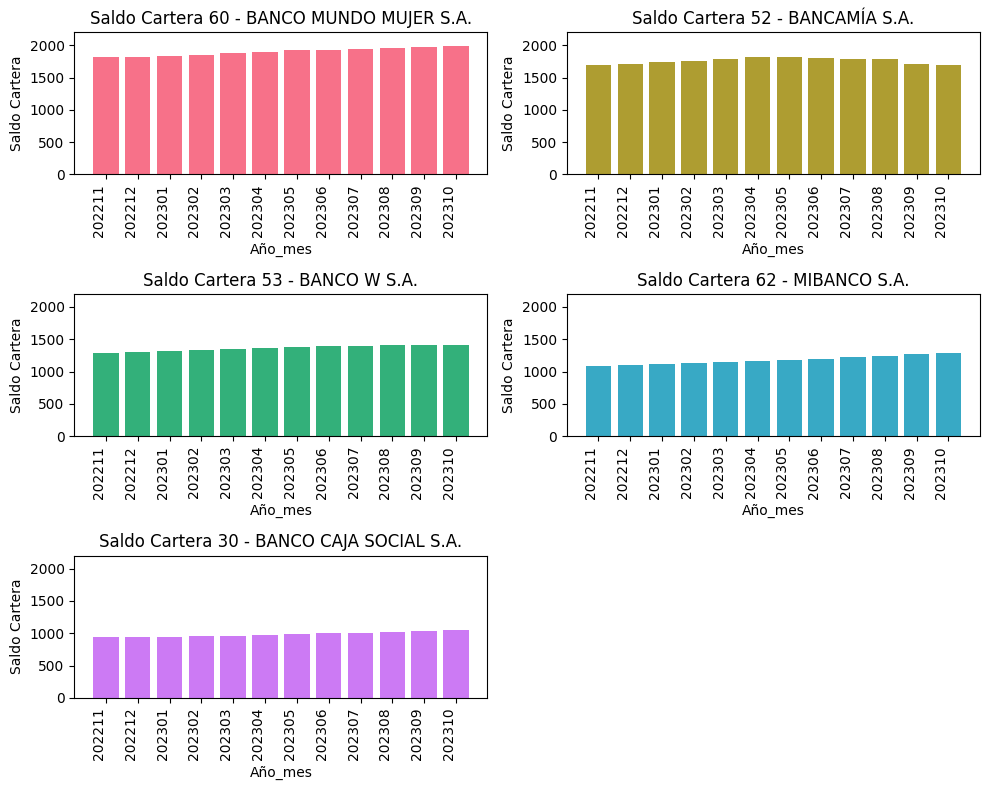

In [ ]:
# Obtener el número total de columnas en data_sdo
num_columnas = len(data_sdo.columns[1:])
# Calcular el número total de subplots
num_subplots = num_columnas if num_columnas % 2 == 0 else num_columnas + 1
# Crear la figura y los subplots
fig, axs = plt.subplots(num_subplots // 2, 2, figsize=(10, 8))

# Iterar sobre los subplots y dibujar las barras correspondientes
for i, ax in enumerate(axs.flat):
    if i < num_columnas:
        color = sns.color_palette("husl", 5)[i]
        ax.bar(data_sdo['AÑOMES'], data_sdo.iloc[:, i + 1], color=color)
        ax.set_xlabel('Año_mes')
        ax.set_ylabel('Saldo Cartera')
        ax.set_title(f'Saldo Cartera {data_sdo.columns[i + 1]}')
        ax.set_ylim(0, 2200)
        ax.set_xticklabels(data_sdo['AÑOMES'], rotation=90, ha='right')
    else:
        ax.axis('off')  # Desactivar los ejes para los subplots adicionales

plt.tight_layout()
plt.show()

GRAFICA ICV HISTORICO POR ENTIDAD: se gráfica el indicador de cartera vencida por entidad.

In [ ]:
data_icv = df_microfinancieras[df_microfinancieras['CONCEPTO'] == 'ICV']
data_icv = data_icv.drop(columns=['CONCEPTO', 'RUBRO'])
data_icv['AÑOMES'] = data_icv['AÑOMES'].astype(str)
for columna in data_icv.columns[1:]:
    data_icv[columna] = data_icv[columna].astype(float)
# Multiplicar por 100 y redondear a dos decimales
for columna in data_icv.columns[1:]:
    data_icv[columna] = (data_icv[columna] * 100).round(2)
data_icv

,AÑOMES,60 - BANCO MUNDO MUJER S.A.,52 - BANCAMÍA S.A.,53 - BANCO W S.A.,62 - MIBANCO S.A.,30 - BANCO CAJA SOCIAL S.A.
1116,202211,4.14,6.01,4.08,4.02,5.30
1117,202212,4.37,5.94,3.89,4.17,5.82
1118,202301,4.54,5.96,4.05,4.30,6.21
1119,202302,4.72,5.90,4.10,4.50,6.60
1120,202303,4.70,6.10,4.32,4.59,6.09
1121,202304,5.13,6.12,4.51,4.89,6.68
1122,202305,5.11,6.25,4.62,5.06,6.92
1123,202306,5.30,6.31,4.74,5.15,6.87
1124,202307,5.48,6.08,5.27,5.11,7.19
1125,202308,5.53,6.15,5.39,4.99,7.32


In [ ]:
print(data_icv.dtypes)

AÑOMES                          object
60 - BANCO MUNDO MUJER S.A.    float64
52 - BANCAMÍA S.A.             float64
53 - BANCO W S.A.              float64
62 - MIBANCO S.A.              float64
30 - BANCO CAJA SOCIAL S.A.    float64
dtype: object


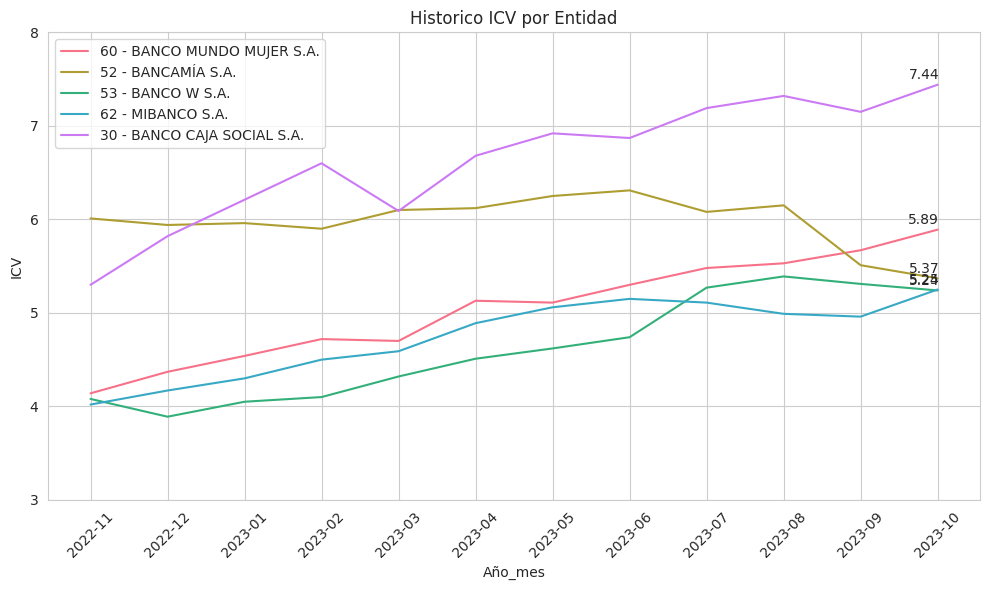

In [ ]:
# Definir el estilo de Seaborn
sns.set_style("whitegrid")
# Obtener etiquetas legibles para el eje x
etiquetas_x = ['{}-{}'.format(str(año_mes)[:4], str(año_mes)[4:]) for año_mes in data_icv['AÑOMES']]
# Definir una paleta de colores
paleta_colores = sns.color_palette("husl", len(data_icv.columns[1:]))

# Graficar los datos
plt.figure(figsize=(10, 6))
for i, column in enumerate(data_icv.columns[1:]):
    sns.lineplot(data=data_icv, x='AÑOMES', y=column, label=column, color=paleta_colores[i])

# Agregar etiquetas de datos
for column in data_icv.columns[1:]:
    ultimo_valor = data_icv[column].iloc[-1]
    plt.annotate(f'{ultimo_valor}', (len(data_icv) - 1, ultimo_valor), textcoords="offset points", xytext=(-10,4), ha='center')

plt.xlabel('Año_mes')
plt.ylabel('ICV')
plt.title('Historico ICV por Entidad')
plt.xticks(range(len(etiquetas_x)), etiquetas_x, rotation=45)
plt.legend()
plt.grid(True)
plt.ylim(3, 8)
plt.tight_layout()
plt.show()

GRAFICA INDICADOR DE CARTERA EN RIESGO: se gráfica el indicador de cartera en riesgo por entidad

In [ ]:
data_icr = df_microfinancieras[df_microfinancieras['CONCEPTO'] == 'ICR']
data_icr = data_icr.drop(columns=['CONCEPTO', 'RUBRO'])
data_icr['AÑOMES'] = data_icr['AÑOMES'].astype(str)
for columna in data_icr.columns[1:]:
    data_icr[columna] = data_icr[columna].astype(float)
# Multiplicar por 100 y redondear a dos decimales
for columna in data_icr.columns[1:]:
    data_icr[columna] = (data_icr[columna] * 100).round(2)
data_icr

,AÑOMES,60 - BANCO MUNDO MUJER S.A.,52 - BANCAMÍA S.A.,53 - BANCO W S.A.,62 - MIBANCO S.A.,30 - BANCO CAJA SOCIAL S.A.
1128,202211,7.53,8.78,10.56,4.81,6.15
1129,202212,8.05,9.23,9.53,4.99,6.81
1130,202301,8.29,9.36,9.49,5.18,7.14
1131,202302,8.65,9.29,9.50,5.47,7.55
1132,202303,9.01,9.52,9.12,5.75,7.01
1133,202304,9.29,9.88,9.41,6.09,7.55
1134,202305,9.63,10.16,9.14,6.45,7.84
1135,202306,9.91,8.72,12.44,6.81,7.88
1136,202307,10.25,10.15,12.63,7.18,8.19
1137,202308,10.28,10.60,12.51,7.23,8.33


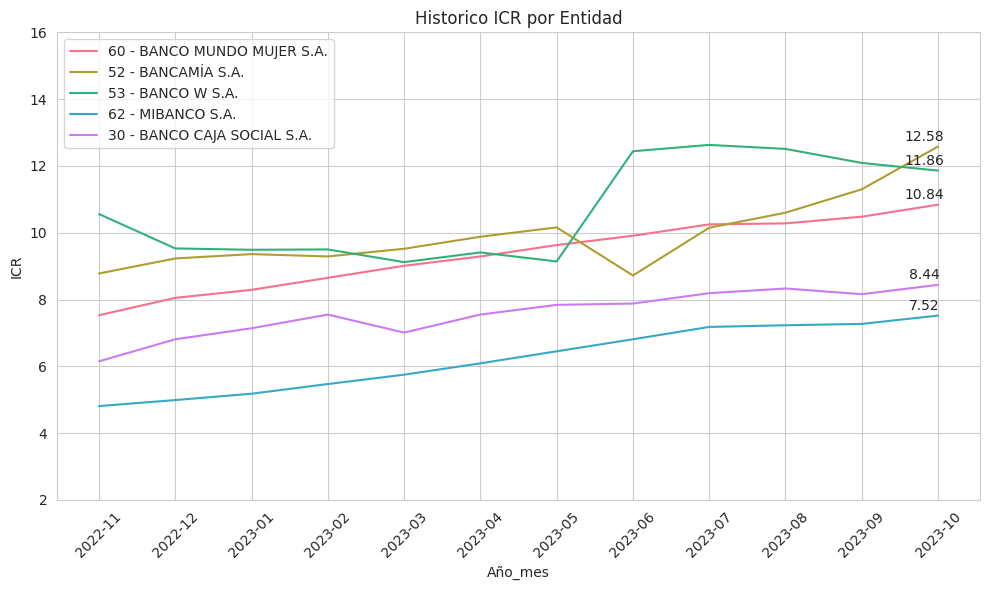

In [ ]:
# Definir el estilo de Seaborn
sns.set_style("whitegrid")
# Obtener etiquetas legibles para el eje x
etiquetas_x = ['{}-{}'.format(str(año_mes)[:4], str(año_mes)[4:]) for año_mes in data_icr['AÑOMES']]
# Definir una paleta de colores
paleta_colores = sns.color_palette("husl", len(data_icr.columns[1:]))

# Graficar los datos
plt.figure(figsize=(10, 6))
for i, column in enumerate(data_icr.columns[1:]):
    sns.lineplot(data=data_icr, x='AÑOMES', y=column, label=column, color=paleta_colores[i])

# Agregar etiquetas de datos
for column in data_icr.columns[1:]:
    ultimo_valor = data_icr[column].iloc[-1]
    plt.annotate(f'{ultimo_valor}', (len(data_icr) - 1, ultimo_valor), textcoords="offset points", xytext=(-10,4), ha='center')

plt.xlabel('Año_mes')
plt.ylabel('ICR')
plt.title('Historico ICR por Entidad')
plt.xticks(range(len(etiquetas_x)), etiquetas_x, rotation=45)
plt.legend()
plt.grid(True)
plt.ylim(2, 16)
plt.tight_layout()
plt.show()

PERDIDA TOLERADA: se gráfica la perdida tolerada por entidad.

In [ ]:
data_pt = df_microfinancieras[df_microfinancieras['CONCEPTO'] == 'pérdida_tolerada']
data_pt = data_pt.drop(columns=['CONCEPTO', 'RUBRO'])
data_pt['AÑOMES'] = data_pt['AÑOMES'].astype(str)
for columna in data_pt.columns[1:]:
    data_pt[columna] = data_pt[columna].astype(float)
# Multiplicar por 100 y redondear a dos decimales
for columna in data_pt.columns[1:]:
    data_pt[columna] = (data_pt[columna] * 100).round(2)
data_pt

,AÑOMES,60 - BANCO MUNDO MUJER S.A.,52 - BANCAMÍA S.A.,53 - BANCO W S.A.,62 - MIBANCO S.A.,30 - BANCO CAJA SOCIAL S.A.
1140,202211,6.01,5.75,5.22,3.72,5.44
1141,202212,6.31,5.69,4.94,3.79,5.72
1142,202301,6.40,5.74,5.14,3.88,5.93
1143,202302,6.71,5.70,5.24,3.99,6.15
1144,202303,6.65,5.88,5.46,4.00,5.93
1145,202304,6.84,5.94,5.66,4.14,6.05
1146,202305,7.03,6.07,5.69,4.30,6.31
1147,202306,7.23,6.18,5.83,4.35,6.19
1148,202307,7.43,5.70,6.10,4.44,6.37
1149,202308,7.50,6.18,6.40,4.45,5.55


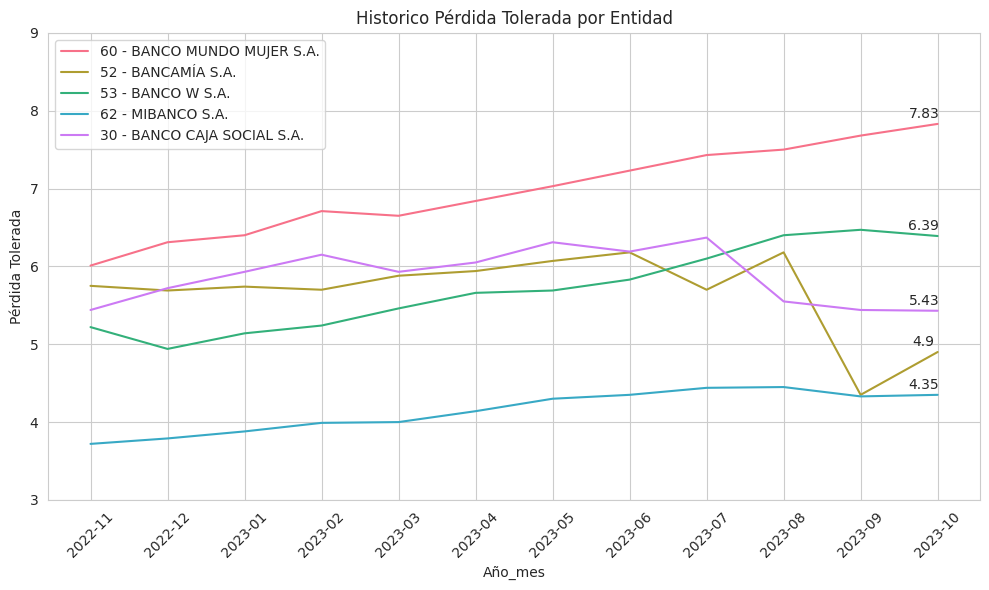

In [ ]:
# Definir el estilo de Seaborn
sns.set_style("whitegrid")
# Obtener etiquetas legibles para el eje x
etiquetas_x = ['{}-{}'.format(str(año_mes)[:4], str(año_mes)[4:]) for año_mes in data_pt['AÑOMES']]
# Definir una paleta de colores
paleta_colores = sns.color_palette("husl", len(data_pt.columns[1:]))

# Graficar los datos
plt.figure(figsize=(10, 6))
for i, column in enumerate(data_pt.columns[1:]):
    sns.lineplot(data=data_pt, x='AÑOMES', y=column, label=column, color=paleta_colores[i])

# Agregar etiquetas de datos
for column in data_pt.columns[1:]:
    ultimo_valor = data_pt[column].iloc[-1]
    plt.annotate(f'{ultimo_valor}', (len(data_pt) - 1, ultimo_valor), textcoords="offset points", xytext=(-10,4), ha='center')

plt.xlabel('Año_mes')
plt.ylabel('Pérdida Tolerada')
plt.title('Historico Pérdida Tolerada por Entidad')
plt.xticks(range(len(etiquetas_x)), etiquetas_x, rotation=45)
plt.legend()
plt.grid(True)
plt.ylim(3, 9)
plt.tight_layout()
plt.show()

GRAFICAS DE COBERTUR DE CARTERA VENCIDA: se gráfican las coberturas de cartera vencida, la cual corresponde al deterioro de cartera sobre el monto de cartera vencida.

In [ ]:
data_cobvenc = df_microfinancieras[df_microfinancieras['CONCEPTO'] == 'cobert_cartera_vencida']
data_cobvenc = data_cobvenc.drop(columns=['CONCEPTO', 'RUBRO'])
data_cobvenc['AÑOMES'] = data_cobvenc['AÑOMES'].astype(str)
for columna in data_cobvenc.columns[1:]:
    data_cobvenc[columna] = data_cobvenc[columna].astype(float)
# Multiplicar por 100 y redondear a dos decimales
for columna in data_cobvenc.columns[1:]:
    data_cobvenc[columna] = (data_cobvenc[columna] * 100).round(2)
data_cobvenc

,AÑOMES,60 - BANCO MUNDO MUJER S.A.,52 - BANCAMÍA S.A.,53 - BANCO W S.A.,62 - MIBANCO S.A.,30 - BANCO CAJA SOCIAL S.A.
1152,202211,145.21,95.67,128.02,92.52,102.77
1153,202212,144.54,95.75,127.10,90.94,98.33
1154,202301,140.88,96.29,126.99,90.20,95.57
1155,202302,142.19,96.51,127.86,88.50,93.30
1156,202303,141.29,96.50,126.46,87.08,97.47
1157,202304,133.30,97.10,125.52,84.67,90.54
1158,202305,137.63,97.12,123.21,84.89,91.17
1159,202306,136.50,97.84,122.98,84.52,90.09
1160,202307,135.44,93.70,115.70,86.83,88.68
1161,202308,135.56,100.48,118.64,89.18,75.85


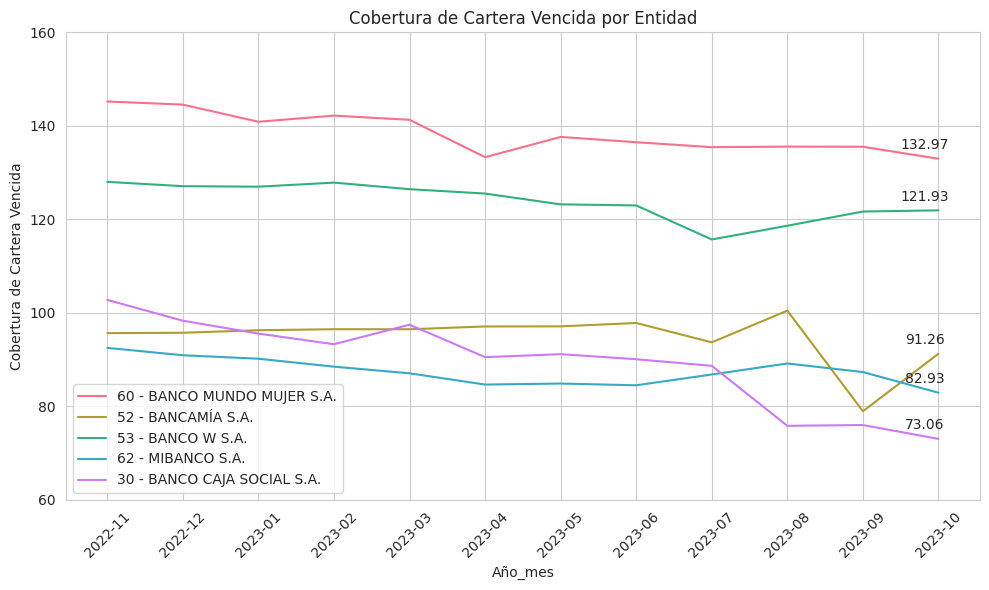

In [ ]:
# Definir el estilo de Seaborn
sns.set_style("whitegrid")
# Obtener etiquetas legibles para el eje x
etiquetas_x = ['{}-{}'.format(str(año_mes)[:4], str(año_mes)[4:]) for año_mes in data_cobvenc['AÑOMES']]
# Definir una paleta de colores
paleta_colores = sns.color_palette("husl", len(data_cobvenc.columns[1:]))

# Graficar los datos
plt.figure(figsize=(10, 6))
for i, column in enumerate(data_cobvenc.columns[1:]):
    sns.lineplot(data=data_cobvenc, x='AÑOMES', y=column, label=column, color=paleta_colores[i])

# Agregar etiquetas de datos
for column in data_cobvenc.columns[1:]:
    ultimo_valor = data_cobvenc[column].iloc[-1]
    plt.annotate(f'{ultimo_valor}', (len(data_cobvenc) - 1, ultimo_valor), textcoords="offset points", xytext=(-10,7), ha='center')

plt.xlabel('Año_mes')
plt.ylabel('Cobertura de Cartera Vencida')
plt.title('Cobertura de Cartera Vencida por Entidad')
plt.xticks(range(len(etiquetas_x)), etiquetas_x, rotation=45)
plt.legend()
plt.grid(True)
plt.ylim(60, 160)
plt.tight_layout()
plt.show()

GRAFICAS DE COBERTURA DE CARTERA EN RIESGO: se gráfican las coberturas de cartera en riesgo, la cual corresponde al deterioro de cartera sobre el monto de cartera en riesgo.

In [ ]:
data_cob_riesgo = df_microfinancieras[df_microfinancieras['CONCEPTO'] == 'cobert_cartera_riesgo']
data_cob_riesgo = data_cob_riesgo.drop(columns=['CONCEPTO', 'RUBRO'])
data_cob_riesgo['AÑOMES'] = data_cob_riesgo['AÑOMES'].astype(str)
for columna in data_cob_riesgo.columns[1:]:
    data_cob_riesgo[columna] = data_cob_riesgo[columna].astype(float)
# Multiplicar por 100 y redondear a dos decimales
for columna in data_cob_riesgo.columns[1:]:
    data_cob_riesgo[columna] = (data_cob_riesgo[columna] * 100).round(2)
data_cob_riesgo

,AÑOMES,60 - BANCO MUNDO MUJER S.A.,52 - BANCAMÍA S.A.,53 - BANCO W S.A.,62 - MIBANCO S.A.,30 - BANCO CAJA SOCIAL S.A.
1164,202211,79.87,65.55,49.44,77.44,88.50
1165,202212,78.35,61.60,51.85,76.04,84.02
1166,202301,77.22,61.28,54.17,74.79,83.04
1167,202302,77.52,61.29,55.11,72.86,81.48
1168,202303,73.75,61.78,59.93,69.59,84.61
1169,202304,73.59,60.13,60.19,67.95,80.13
1170,202305,73.03,59.77,62.24,66.57,80.48
1171,202306,72.95,70.86,46.88,63.92,78.61
1172,202307,72.50,56.14,48.30,61.83,77.80
1173,202308,73.00,58.29,51.14,61.56,66.65


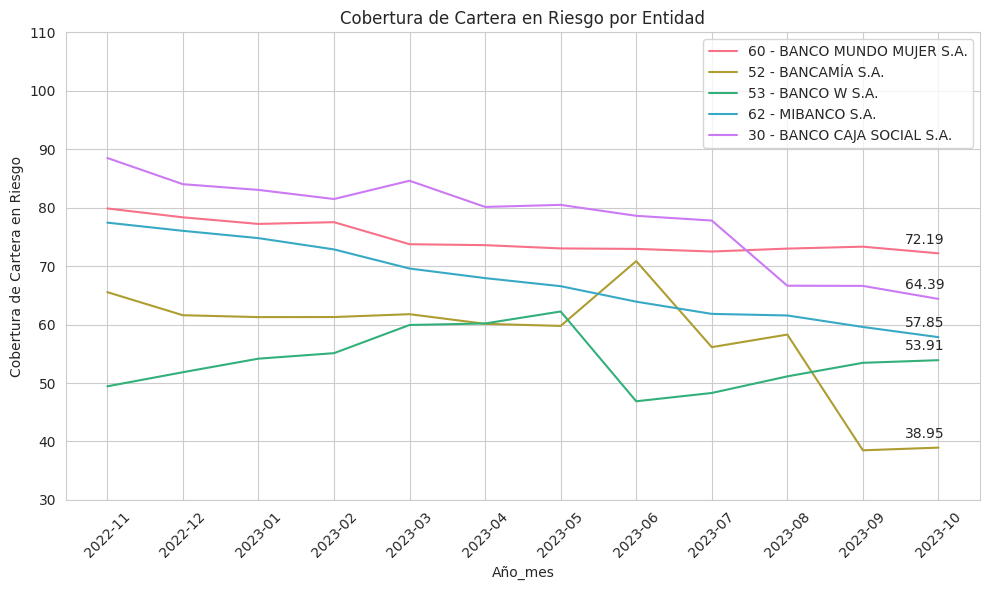

In [ ]:
# Definir el estilo de Seaborn
sns.set_style("whitegrid")
# Obtener etiquetas legibles para el eje x
etiquetas_x = ['{}-{}'.format(str(año_mes)[:4], str(año_mes)[4:]) for año_mes in data_cob_riesgo['AÑOMES']]
# Definir una paleta de colores
paleta_colores = sns.color_palette("husl", len(data_cob_riesgo.columns[1:]))

# Graficar los datos
plt.figure(figsize=(10, 6))
for i, column in enumerate(data_cob_riesgo.columns[1:]):
    sns.lineplot(data=data_cob_riesgo, x='AÑOMES', y=column, label=column, color=paleta_colores[i])

# Agregar etiquetas de datos
for column in data_cob_riesgo.columns[1:]:
    ultimo_valor = data_cob_riesgo[column].iloc[-1]
    plt.annotate(f'{ultimo_valor}', (len(data_cob_riesgo) - 1, ultimo_valor), textcoords="offset points", xytext=(-10,7), ha='center')

plt.xlabel('Año_mes')
plt.ylabel('Cobertura de Cartera en Riesgo')
plt.title('Cobertura de Cartera en Riesgo por Entidad')
plt.xticks(range(len(etiquetas_x)), etiquetas_x, rotation=45)
plt.legend()
plt.grid(True)
plt.ylim(30, 110)
plt.tight_layout()
plt.show()

Se guarda la base de datos limpia en un archivo CSV.

In [ ]:
df_microfinancieras.to_csv('df_microfinancieras.csv', index = False)